In [749]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import math

In [438]:
import warnings
warnings.filterwarnings('ignore')

- electricity mix data https://ourworldindata.org/electricity-mix [accessed 24/10/2023]
- total electricity generation https://ourworldindata.org/grapher/electricity-generation [accessed 19/10/2023]

In [469]:
capacity_data = pd.read_csv("../_data_process/combined_coal_gas_indicators.csv")
capacity_data

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Gas_Growth_MW,Gas_FuelSwitch,Gas_Substitution,Wind_Growth_MW,Wind_FuelSwitch,Wind_Substitution,Solar_Growth_MW,Solar_FuelSwitch,Solar_Substitution,Coal_Phaseout_MW
0,DEU,1927,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1928,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1929,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEU,1930,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DEU,1931,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,BRN,2021,220.0,1.2,2019.0,220.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3879,BRN,2022,220.0,1.2,2019.0,220.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,ARE,2020,600.0,2.3,2020.0,600.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3881,ARE,2021,1200.0,4.6,2020.0,1200.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
el_share = pd.read_csv("electricity-prod-source-stacked.csv")
el_share = el_share[el_share["Code"].isna()==False]
el_share

,Entity,Code,Year,Other renewables excluding bioenergy (TWh),Electricity from bioenergy (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from nuclear (TWh),Electricity from oil (TWh),Electricity from gas (TWh),Electricity from coal (TWh)
23,Afghanistan,AFG,2000,0.0,0.00,0.00,0.0,0.31,0.0,0.16,0.0,0.00
24,Afghanistan,AFG,2001,0.0,0.00,0.00,0.0,0.50,0.0,0.09,0.0,0.00
25,Afghanistan,AFG,2002,0.0,0.00,0.00,0.0,0.56,0.0,0.13,0.0,0.00
26,Afghanistan,AFG,2003,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.0,0.00
27,Afghanistan,AFG,2004,0.0,0.00,0.00,0.0,0.56,0.0,0.33,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6686,Zimbabwe,ZWE,2017,0.0,0.32,0.01,0.0,3.97,0.0,0.03,0.0,3.02
6687,Zimbabwe,ZWE,2018,0.0,0.39,0.02,0.0,5.05,0.0,0.04,0.0,3.69
6688,Zimbabwe,ZWE,2019,0.0,0.38,0.03,0.0,4.17,0.0,0.04,0.0,3.62
6689,Zimbabwe,ZWE,2020,0.0,0.35,0.03,0.0,3.81,0.0,0.04,0.0,3.36


In [641]:
crosswalk = pd.read_excel("../../data/MESSAGE/mapping_file_R10edit.xlsx",sheet_name="main")

In [7]:
el_gen = pd.read_csv("electricity-generation.csv")
el_gen = el_gen[el_gen["Code"].isna()==False]
el_gen

,Entity,Code,Year,Electricity generation (TWh)
23,Afghanistan,AFG,2000,0.47
24,Afghanistan,AFG,2001,0.59
25,Afghanistan,AFG,2002,0.69
26,Afghanistan,AFG,2003,0.94
27,Afghanistan,AFG,2004,0.89
...,...,...,...,...
7186,Zimbabwe,ZWE,2017,7.35
7187,Zimbabwe,ZWE,2018,9.19
7188,Zimbabwe,ZWE,2019,8.24
7189,Zimbabwe,ZWE,2020,7.59


In [728]:
generation_data = pd.merge(el_share[["Code","Year","Electricity from solar (TWh)","Electricity from wind (TWh)",
                                                "Electricity from nuclear (TWh)","Electricity from gas (TWh)","Electricity from coal (TWh)"]],el_gen,
                         on=["Code","Year"],how="left")
generation_data = pd.merge(generation_data,crosswalk[["AR6_R10","ISO"]],left_on="Code",right_on="ISO",how="left")
generation_data["Share_Solar_Gen"] = generation_data["Electricity from solar (TWh)"]/generation_data["Electricity generation (TWh)"]
generation_data["Share_Wind_Gen"] = generation_data["Electricity from wind (TWh)"]/generation_data["Electricity generation (TWh)"]
generation_data["Share_Nuclear_Gen"] = generation_data["Electricity from nuclear (TWh)"]/generation_data["Electricity generation (TWh)"]
generation_data["Share_Gas_Gen"] = generation_data["Electricity from gas (TWh)"]/generation_data["Electricity generation (TWh)"]
generation_data["Share_Coal_Gen"] = generation_data["Electricity from coal (TWh)"]/generation_data["Electricity generation (TWh)"]
generation_data = generation_data[generation_data["Electricity generation (TWh)"].isna()==False]
#generation_data.set_index("Code").to_csv("combined_generation.csv")
generation_data

,Code,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Entity,Electricity generation (TWh),AR6_R10,ISO,Share_Solar_Gen,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen
0,AFG,2000,0.00,0.0,0.0,0.0,0.00,Afghanistan,0.47,R10INDIA+,AFG,0.000000,0.0,0.0,0.0,0.000000
1,AFG,2000,0.00,0.0,0.0,0.0,0.00,Afghanistan,0.47,R10REST_ASIA,AFG,0.000000,0.0,0.0,0.0,0.000000
2,AFG,2001,0.00,0.0,0.0,0.0,0.00,Afghanistan,0.59,R10INDIA+,AFG,0.000000,0.0,0.0,0.0,0.000000
3,AFG,2001,0.00,0.0,0.0,0.0,0.00,Afghanistan,0.59,R10REST_ASIA,AFG,0.000000,0.0,0.0,0.0,0.000000
4,AFG,2002,0.00,0.0,0.0,0.0,0.00,Afghanistan,0.69,R10INDIA+,AFG,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,ZWE,2017,0.01,0.0,0.0,0.0,3.02,Zimbabwe,7.35,R10AFRICA,ZWE,0.001361,0.0,0.0,0.0,0.410884
5908,ZWE,2018,0.02,0.0,0.0,0.0,3.69,Zimbabwe,9.19,R10AFRICA,ZWE,0.002176,0.0,0.0,0.0,0.401523
5909,ZWE,2019,0.03,0.0,0.0,0.0,3.62,Zimbabwe,8.24,R10AFRICA,ZWE,0.003641,0.0,0.0,0.0,0.439320
5910,ZWE,2020,0.03,0.0,0.0,0.0,3.36,Zimbabwe,7.59,R10AFRICA,ZWE,0.003953,0.0,0.0,0.0,0.442688


In [727]:
combined_data_new = pd.merge(capacity_data,generation_data,
                         left_on=["Country Code","Year"],right_on=["Code","Year"],how="left")
combined_data_new

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Electricity from coal (TWh),Entity,Electricity generation (TWh),AR6_R10,ISO,Share_Solar_Gen,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen
0,DEU,1927,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1928,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1929,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEU,1930,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DEU,1931,36.0,0.2,1927.0,36.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,BRN,2021,220.0,1.2,2019.0,220.0,0.0,0.0,0.0,2.0,...,2.32,Brunei,4.69000,R10REST_ASIA,BRN,0.000000,0.000000e+00,0.000000,0.477612,0.49467
3974,BRN,2022,220.0,1.2,2019.0,220.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,ARE,2020,600.0,2.3,2020.0,600.0,0.0,0.0,0.0,0.0,...,0.00,United Arab Emirates,126.55000,R10MIDDLE_EAST,ARE,0.043382,0.000000e+00,0.012327,0.944212,0.00000
3976,ARE,2021,1200.0,4.6,2020.0,1200.0,0.0,0.0,0.0,1.0,...,0.00,United Arab Emirates,135.63000,R10MIDDLE_EAST,ARE,0.049325,0.000000e+00,0.013198,0.937403,0.00000


In [753]:
count = 0
for cntry in combined_data_new["Country Code"].unique():
    combined_data_cntry = combined_data_new[combined_data_new["Country Code"]==cntry]
    max_coal = combined_data_cntry["Electricity from coal (TWh)"].max()
    if math.isnan(max_coal) == False:
        max_coal_year = combined_data_cntry[combined_data_cntry["Electricity from coal (TWh)"]==max_coal]["Year"].iloc[-1]
        if max_coal_year < combined_data_cntry["Year"].max()-5 and combined_data_cntry["Coal_Peak_MW"].max()>1000:
            max_coal_row = combined_data_cntry[combined_data_cntry["Year"]==max_coal_year]
            combined_data_cntry["max_coal"] = max_coal
            combined_data_cntry["max_coal_year"] = max_coal_year
            max_coal_perc_row = combined_data_cntry[combined_data_cntry["Share_Coal_Gen"]==combined_data_cntry["Share_Coal_Gen"].max()]
            combined_data_cntry["max_perc_coal"] = max_coal_perc_row["Share_Coal_Gen"].iloc[0]
            combined_data_cntry["max_perc_coal_year"] = max_coal_perc_row["Year"].iloc[-1]
            max_coal_cap_row = combined_data_cntry[combined_data_cntry["Coal_Current_MW"]==combined_data_cntry["Coal_Peak_MW"].max()]
            combined_data_cntry["max_cap_coal_year"] = max_coal_cap_row["Year"].iloc[-1]
            combined_data_cntry["Gen_Coal_vPeak"] = combined_data_cntry["Electricity from coal (TWh)"]/max_coal
            combined_data_cntry["Gen_Solar_new_TWh"] = combined_data_cntry["Electricity from solar (TWh)"]-max_coal_row["Electricity from solar (TWh)"].iloc[0]
            combined_data_cntry["Gen_Solar_vPeakCoal"] = combined_data_cntry["Gen_Solar_new_TWh"]/max_coal
            combined_data_cntry["Gen_Wind_new_TWh"] = combined_data_cntry["Electricity from wind (TWh)"]-max_coal_row["Electricity from wind (TWh)"].iloc[0]
            combined_data_cntry["Gen_Wind_vPeakCoal"] = combined_data_cntry["Gen_Wind_new_TWh"]/max_coal
            combined_data_cntry["Gen_Nuclear_new_TWh"] = combined_data_cntry["Electricity from nuclear (TWh)"]-max_coal_row["Electricity from nuclear (TWh)"].iloc[0]
            combined_data_cntry["Gen_Nuclear_vPeakCoal"] = combined_data_cntry["Gen_Nuclear_new_TWh"]/max_coal
            combined_data_cntry["Gen_Gas_new_TWh"] = combined_data_cntry["Electricity from gas (TWh)"]-max_coal_row["Electricity from gas (TWh)"].iloc[0]
            combined_data_cntry["Gen_Gas_vPeakCoal"] = combined_data_cntry["Gen_Gas_new_TWh"]/max_coal
            combined_data_cntry["Gen_Growth"] = (combined_data_cntry["Electricity generation (TWh)"]-max_coal_row["Electricity generation (TWh)"].iloc[0])/max_coal+1
            combined_data_cntry = combined_data_cntry[combined_data_cntry["Electricity from coal (TWh)"].isna()==False]
            if count == 0:
                calc_data = combined_data_cntry
            else:
                calc_data = pd.concat([calc_data,combined_data_cntry])
            count = count + 1
# remove north korea
calc_data = calc_data[calc_data["Country Code"]!="PRK"]
calc_data["Gen_Coal_PhaseOut"] = calc_data["Gen_Coal_vPeak"]-1
calc_data["RE_vPeakCoal"] = calc_data["Gen_Solar_vPeakCoal"]+calc_data["Gen_Wind_vPeakCoal"]
calc_data["year_since_peak_gen"] = calc_data["Year"]-calc_data["max_coal_year"]
calc_data["year_since_peak_share"] = calc_data["Year"]-calc_data["max_perc_coal_year"]
calc_data["rate_decline_gen"] = (1-calc_data["Gen_Coal_vPeak"])*100/calc_data["year_since_peak_gen"]
calc_data["rate_decline_share"] = (calc_data["max_perc_coal"]-calc_data["Share_Coal_Gen"])*100/calc_data["year_since_peak_share"]
#calc_data.set_index("Country Code").to_csv("hist_coal_generation.csv")
calc_data

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Gen_Nuclear_vPeakCoal,Gen_Gas_new_TWh,Gen_Gas_vPeakCoal,Gen_Growth,Gen_Coal_PhaseOut,RE_vPeakCoal,year_since_peak_gen,year_since_peak_share,rate_decline_gen,rate_decline_share
63,DEU,1990,45410.5,250.1,1927.0,45410.5,0.0,0.0,0.0,63.0,...,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0,-1,NaN,-0.720604
64,DEU,1991,45832.5,252.5,1927.0,45832.5,0.0,0.0,0.0,64.0,...,-0.016901,-4.35,-0.014030,0.964553,-0.007644,0.000484,1,0,0.764411,NaN
65,DEU,1992,46559.5,256.3,1927.0,46559.5,0.0,0.0,0.0,65.0,...,0.020417,-7.57,-0.024416,0.957554,-0.046349,0.000710,2,1,2.317443,2.015145
66,DEU,1993,47339.5,260.4,1927.0,47339.5,0.0,0.0,0.0,66.0,...,0.002613,-5.89,-0.018998,0.921526,-0.054154,0.001935,3,2,1.805141,0.646927
67,DEU,1994,47929.9,263.2,1927.0,47929.9,0.0,0.0,0.0,67.0,...,-0.005709,-0.21,-0.000677,0.930299,-0.063701,0.004419,4,3,1.592535,0.716035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,MEX,2018,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,36.0,...,0.152484,51.93,1.612733,2.468012,-0.115839,0.315217,6,15,1.930642,0.323644
3348,MEX,2019,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,37.0,...,0.076708,43.49,1.350621,2.035093,-0.094720,0.621429,7,16,1.353150,0.266568
3349,MEX,2020,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,38.0,...,0.076398,50.80,1.577640,2.266149,-0.426708,0.846894,8,17,5.333851,0.456384
3350,MEX,2021,5378.0,27.4,1982.0,5378.0,0.0,0.0,0.0,39.0,...,0.093789,54.89,1.704658,2.621118,-0.587267,0.974845,9,18,6.525190,0.526958


In [754]:
all_countries = list(calc_data["Country Code"].unique())
count = 0
for cntry in all_countries:
    last_row = calc_data[calc_data["Country Code"]==cntry].iloc[[-1]]
    if count == 0:
        all_last_rows = last_row
    else:
        all_last_rows = pd.concat([all_last_rows,last_row])
    count = count+1
# renewable strategy
select_re_countries = all_last_rows[all_last_rows['Gen_Gas_vPeakCoal']<0.1]
select_re_countries = select_re_countries[select_re_countries[['Gen_Solar_vPeakCoal','Gen_Wind_vPeakCoal']].sum(axis=1)>0.1]
select_re_countries = select_re_countries.sort_values(by=["max_coal_year","Coal_Peak_MW"],ascending=[True,False])
select_re_countries_list = list(select_re_countries["Country Code"].unique())
ind_re = all_last_rows[all_last_rows["Country Code"].isin(select_re_countries_list)].index
all_last_rows.loc[ind_re,"label"] = "RE"

# mixed strategt
select_mix_countries = all_last_rows[all_last_rows['Gen_Gas_vPeakCoal']>0.1]
select_mix_countries = select_mix_countries[select_mix_countries[['Gen_Solar_vPeakCoal','Gen_Wind_vPeakCoal']].sum(axis=1)>0.2]
select_mix_countries = select_mix_countries.sort_values(by=["max_coal_year","Coal_Peak_MW"],ascending=[True,False])
select_mix_countries_list = list(select_mix_countries["Country Code"].unique())
ind_mix = all_last_rows[all_last_rows["Country Code"].isin(select_mix_countries_list)].index
all_last_rows.loc[ind_mix,"label"] = "Mixed"

# ng strategy
select_gas_countries = all_last_rows[all_last_rows['Gen_Gas_vPeakCoal']>0.6]
select_gas_countries = select_gas_countries[select_gas_countries[['Gen_Solar_vPeakCoal','Gen_Wind_vPeakCoal']].sum(axis=1)<0.2]
select_gas_countries = select_gas_countries.sort_values(by=["max_coal_year","Coal_Peak_MW"],ascending=[True,False])
select_gas_countries_list = list(select_gas_countries["Country Code"].unique())
ind_gas = all_last_rows[all_last_rows["Country Code"].isin(select_gas_countries_list)].index
all_last_rows.loc[ind_gas,"label"] = "Gas"

countries_so_far = select_re_countries_list + select_mix_countries_list + select_gas_countries_list
remaining_countries = all_last_rows[all_last_rows["Country Code"].isin(countries_so_far)==False]
remaining_countries_list = list(remaining_countries["Country Code"].unique())
ind_remain = all_last_rows[all_last_rows["Country Code"].isin(remaining_countries_list)].index
all_last_rows.loc[ind_remain,"label"] = "None"
all_last_rows.set_index("Country Code").to_csv("hist_coal_generation_lastrows.csv")
country_list = select_re_countries_list+ select_gas_countries_list + select_mix_countries_list  + remaining_countries_list

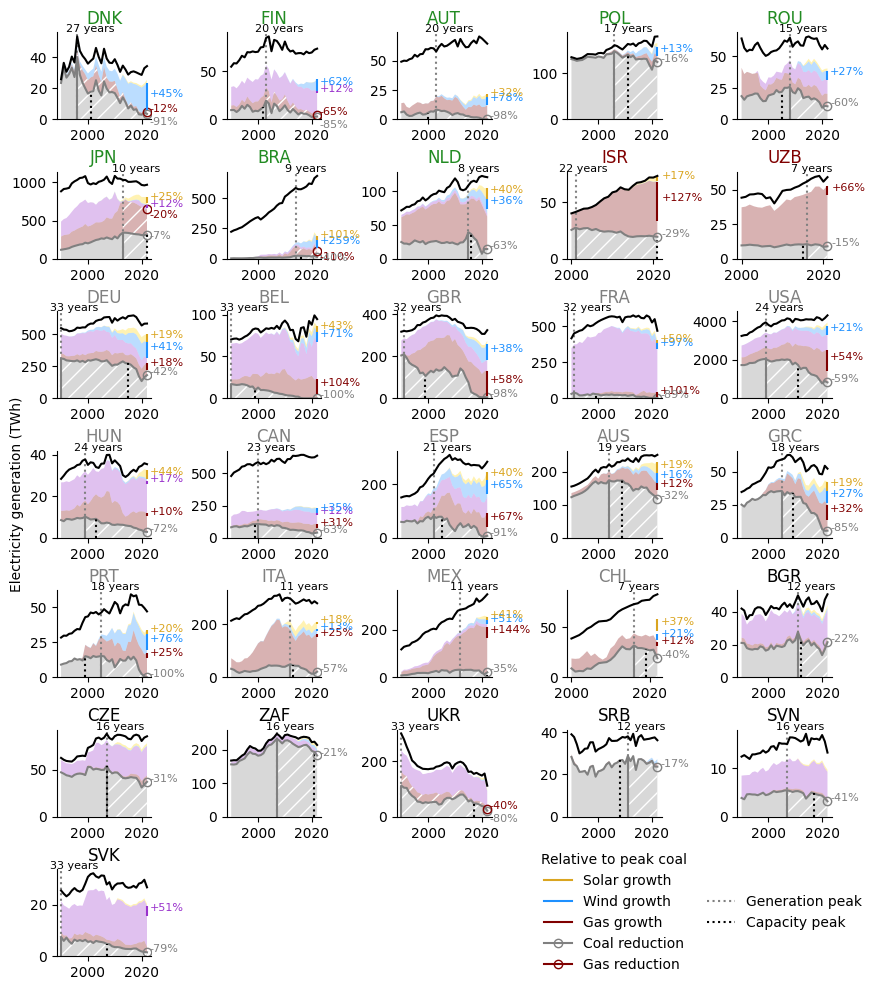

In [450]:
fig, axes = plt.subplots(7,5,figsize=(10,12))
fig.subplots_adjust(wspace=0.8,hspace=0.6)
plt.rcParams['hatch.color'] = "white"

for cntry in country_list:
    n_ind = country_list.index(cntry)
    this_ax = axes.flatten()[n_ind]
    combined_data_cntry = calc_data[calc_data["Country Code"]==cntry]
    max_coal_year = combined_data_cntry["max_coal_year"].iloc[0]
    max_coal = combined_data_cntry["max_coal"].iloc[0]
    
    # area plot for coal decline and corresponding replacement technologies
    combined_data_cntry_before =combined_data_cntry[combined_data_cntry["Year"]<=max_coal_year]
    combined_data_cntry_fresh =combined_data_cntry[combined_data_cntry["Year"]>=max_coal_year]
    this_ax.stackplot(combined_data_cntry.Year, combined_data_cntry['Electricity from coal (TWh)'],combined_data_cntry['Electricity from gas (TWh)'],
                      combined_data_cntry['Electricity from nuclear (TWh)'],
                   combined_data_cntry['Electricity from wind (TWh)'],combined_data_cntry['Electricity from solar (TWh)'], 
                   colors=["gray","maroon","darkorchid","dodgerblue","gold"],alpha=0.3,zorder=1)
    # hatch coal and gas if reduced
    if combined_data_cntry.iloc[-1]['Gen_Gas_vPeakCoal'] < -0.1:
        this_ax.stackplot(combined_data_cntry_fresh.Year, combined_data_cntry_fresh['Electricity from coal (TWh)'],
                          combined_data_cntry_fresh['Electricity from gas (TWh)'],
                          hatch="//",alpha=0,zorder=1)
    else:
        this_ax.stackplot(combined_data_cntry_fresh.Year, combined_data_cntry_fresh['Electricity from coal (TWh)'],hatch="//",colors="white",alpha=0,zorder=1)
    # lineplot of the coal generation
    this_ax.plot(combined_data_cntry.Year, combined_data_cntry['Electricity from coal (TWh)'],color="gray",zorder=2)
    # line plot of total generation
    this_ax.plot(combined_data_cntry.Year, combined_data_cntry['Electricity generation (TWh)'],color="black",zorder=3)
    
    # indicate max coal generation year
    [bot,top] = this_ax.get_ylim()
    this_ax.axvline(x=max_coal_year,ls=":",color="gray")
    this_ax.vlines(x=max_coal_year,ymin=0,ymax=max_coal,color="gray")
    this_ax.text(x=max_coal_year-4,y=top,s=str(2023-max_coal_year)+" years",color="black",fontsize=8)
    
    # indicate peak coal capacity 
    peak_coal_row = combined_data_cntry[combined_data_cntry['Coal_Current_MW']==combined_data_cntry['Coal_Peak_MW'].max()]
    if len(peak_coal_row) != 0:
        this_ax.vlines(x=peak_coal_row["Year"].iloc[-1],ymin=0,ymax=peak_coal_row['Electricity from coal (TWh)'].iloc[-1],ls=":",color="black")

    # indicate the current progress in coal phase out
    this_ax.plot(combined_data_cntry.iloc[-1]["Year"],combined_data_cntry.iloc[-1]['Electricity from coal (TWh)'],"-o",
                 color="gray",markerfacecolor="none")
    # countries with gas phase out!
    if combined_data_cntry.iloc[-1]['Gen_Gas_vPeakCoal'] < -0.1:
        this_ax.plot(combined_data_cntry.iloc[-1]["Year"],
                     combined_data_cntry.iloc[-1]['Electricity from coal (TWh)']+combined_data_cntry.iloc[-1]['Electricity from gas (TWh)'],"-o",
                 color="maroon",markerfacecolor="none")

    # countries without gas phase out
    elif combined_data_cntry.iloc[-1]['Gen_Gas_vPeakCoal'] > 0.1:
        gas_bot = combined_data_cntry_fresh['Electricity from coal (TWh)'].iloc[-1] + combined_data_cntry_fresh['Electricity from gas (TWh)'].iloc[0]
        gas_top = combined_data_cntry_fresh['Electricity from coal (TWh)'].iloc[-1] + combined_data_cntry_fresh['Electricity from gas (TWh)'].iloc[-1]
        this_ax.vlines(x=combined_data_cntry.iloc[-1]["Year"],ymin=gas_bot,ymax=gas_top,ls="-",color="maroon")
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=(gas_bot+gas_top)/2,
                      s="+"+str(round((combined_data_cntry.iloc[-1]["Gen_Gas_vPeakCoal"])*100))+"%",color="maroon",fontsize=8)
        transition_gas = True
        
    # shift coal and gas reduction     
    distance_coal_gas = combined_data_cntry.iloc[-1]['Electricity from gas (TWh)']/combined_data_cntry.iloc[-1]['Electricity from coal (TWh)'] 
    y_sum = (combined_data_cntry.iloc[-1]['Electricity from coal (TWh)']+combined_data_cntry.iloc[-1]['Electricity from gas (TWh)'])
    if distance_coal_gas > 0.5 and combined_data_cntry.iloc[-1]['Gen_Gas_vPeakCoal'] < -0.1:
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=y_sum-top*0.1,
                      s=str(round((combined_data_cntry.iloc[-1]["Gen_Gas_vPeakCoal"])*100))+"%",color="maroon",fontsize=8)
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=combined_data_cntry.iloc[-1]['Electricity from coal (TWh)']-top*0.05,
              s="-"+str(round((1-combined_data_cntry.iloc[-1]["Gen_Coal_vPeak"])*100))+"%",color="gray",fontsize=8)
    elif distance_coal_gas <= 0.5 and combined_data_cntry.iloc[-1]['Gen_Gas_vPeakCoal'] < -0.1:
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=y_sum,
                      s=str(round((combined_data_cntry.iloc[-1]["Gen_Gas_vPeakCoal"])*100))+"%",color="maroon",fontsize=8)
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=y_sum-top*0.15,
              s="-"+str(round((1-combined_data_cntry.iloc[-1]["Gen_Coal_vPeak"])*100))+"%",color="gray",fontsize=8)
    else:
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=combined_data_cntry.iloc[-1]['Electricity from coal (TWh)'],
              s="-"+str(round((1-combined_data_cntry.iloc[-1]["Gen_Coal_vPeak"])*100))+"%",color="gray",fontsize=8)
        
    # renewable growth
    if combined_data_cntry.iloc[-1]['Gen_Nuclear_vPeakCoal'] > 0.1:
        tech_list_nuc = ['Electricity from coal (TWh)','Electricity from gas (TWh)']
        nuc_bot = combined_data_cntry_fresh[tech_list_nuc].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from nuclear (TWh)'].iloc[0]
        nuc_top = combined_data_cntry_fresh[tech_list_nuc].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from nuclear (TWh)'].iloc[-1]
        this_ax.vlines(x=combined_data_cntry.iloc[-1]["Year"],ymin=nuc_bot,ymax=nuc_top,ls="-",color="darkorchid")
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=(nuc_bot+nuc_top)/2,
                      s="+"+str(round((combined_data_cntry.iloc[-1]["Gen_Nuclear_vPeakCoal"])*100))+"%",color="darkorchid",fontsize=8)
    if combined_data_cntry.iloc[-1]['Gen_Wind_vPeakCoal'] > 0.1:
        tech_list_wind = ['Electricity from coal (TWh)','Electricity from gas (TWh)','Electricity from nuclear (TWh)']
        wind_bot = combined_data_cntry_fresh[tech_list_wind].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from wind (TWh)'].iloc[0]
        wind_top = combined_data_cntry_fresh[tech_list_wind].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from wind (TWh)'].iloc[-1]
        this_ax.vlines(x=combined_data_cntry.iloc[-1]["Year"],ymin=wind_bot,ymax=wind_top,ls="-",color="dodgerblue")
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=(wind_bot+wind_top)/2,
                      s="+"+str(round((combined_data_cntry.iloc[-1]["Gen_Wind_vPeakCoal"])*100))+"%",color="dodgerblue",fontsize=8)
    if combined_data_cntry.iloc[-1]['Gen_Solar_vPeakCoal'] > 0.1:
        tech_list_solar = ['Electricity from coal (TWh)','Electricity from gas (TWh)','Electricity from wind (TWh)','Electricity from nuclear (TWh)']
        solar_bot = combined_data_cntry_fresh[tech_list_solar].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from solar (TWh)'].iloc[0]
        solar_top = combined_data_cntry_fresh[tech_list_solar].sum(axis=1).iloc[-1] + combined_data_cntry_fresh['Electricity from solar (TWh)'].iloc[-1]
        this_ax.vlines(x=combined_data_cntry.iloc[-1]["Year"],ymin=solar_bot,ymax=solar_top,ls="-",color="goldenrod")
        this_ax.text(x=combined_data_cntry.iloc[-1]["Year"]+1,y=(solar_bot+solar_top)/2,
                      s="+"+str(round((combined_data_cntry.iloc[-1]["Gen_Solar_vPeakCoal"])*100))+"%",color="goldenrod",fontsize=8)

    
    # axis set up
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)
    this_ax.set_title(cntry)
    if cntry in select_gas_countries_list:
        this_ax.title.set_color('maroon')
    elif cntry in select_re_countries_list:
        this_ax.title.set_color('forestgreen')
    elif cntry in select_mix_countries_list:
        this_ax.title.set_color('gray')

custom_lines = [Line2D([0], [0], color="goldenrod",label='Solar growth'),
                Line2D([0], [0], color="dodgerblue", label='Wind growth'),
                Line2D([0], [0], color="maroon", label='Gas growth'),
               Line2D([0], [0], marker='o', color='gray', label='Coal reduction',
                          markerfacecolor='none', markersize=6),
                Line2D([0], [0], marker='o', color='maroon', label='Gas reduction',
                          markerfacecolor='none', markersize=6)]
axes.flatten()[-2].legend(handles=custom_lines,loc='center',title="Relative to peak coal",frameon=False)
axes.flatten()[-2].set_axis_off()
custom_lines = [Line2D([0], [0], color="gray",ls = ":",label='Generation peak'),
                Line2D([0], [0], color="black", ls = ":",label='Capacity peak')]
axes.flatten()[-1].legend(handles=custom_lines,loc='center',frameon=False)
axes.flatten()[-1].set_axis_off()
axes.flatten()[-4].remove()
axes.flatten()[-3].remove()
axes[3,0].set_ylabel("Electricity generation (TWh)")
fig.savefig("generation_narratives.png",dpi=600, bbox_inches='tight')

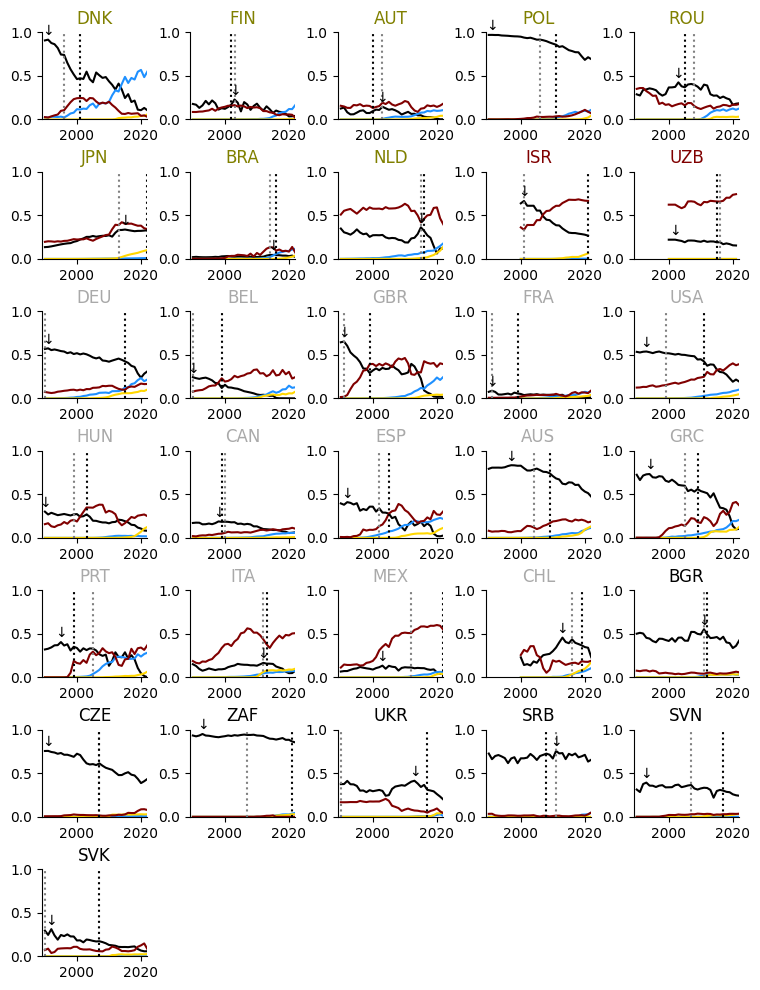

In [596]:
fig, axes = plt.subplots(7,5,figsize=(9,12))
fig.subplots_adjust(wspace=0.4,hspace=0.6)
for cntry in country_list:
    n_ind = country_list.index(cntry)
    this_ax = axes.flatten()[n_ind]
    combined_data_cntry = calc_data[calc_data["Country Code"]==cntry]

    max_coal_year = combined_data_cntry["max_coal_year"].iloc[0]
    this_data_select = combined_data_cntry#[combined_data_cntry["Year"]>=max_coal_year]
    #sns.lineplot(x="Year",y='Gen_Coal_PhaseOut',data=this_data_select,color="black",zorder=1,ax=this_ax)
    ##sns.lineplot(x="Year",y='RE_vPeakCoal',data=this_data_select,color="olive",zorder=1,ax=this_ax)
    #sns.lineplot(x="Year",y='Gen_Gas_vPeakCoal',data=this_data_select,color="maroon",zorder=1,ax=this_ax)
    sns.lineplot(x="Year",y='Share_Coal_Gen',data=this_data_select,color="black",zorder=1,ax=this_ax)
    sns.lineplot(x="Year",y='Share_Wind_Gen',data=this_data_select,color="dodgerblue",zorder=1,ax=this_ax)
    sns.lineplot(x="Year",y='Share_Solar_Gen',data=this_data_select,color="gold",zorder=1,ax=this_ax)
    sns.lineplot(x="Year",y='Share_Gas_Gen',data=this_data_select,color="maroon",zorder=1,ax=this_ax)
    
    this_ax.axvline(x=max_coal_year,color="gray",ls=":")
    peak_coal_row = this_data_select[this_data_select['Coal_Current_MW']==this_data_select['Coal_Peak_MW'].max()]
    if len(peak_coal_row) != 0:
        this_ax.axvline(x=peak_coal_row["Year"].iloc[-1],color="black",ls=":")
    peak_coal_percent_row = this_data_select[this_data_select['Share_Coal_Gen']==this_data_select['Share_Coal_Gen'].max()]
    if len(peak_coal_percent_row) != 0:
        this_ax.text(x=peak_coal_percent_row["Year"].iloc[-1],y=peak_coal_percent_row["Share_Coal_Gen"].iloc[0]+0.1,s="↓",ha="center", va="center")
    this_ax.set_xlim([1989,2022])
    this_ax.set_ylim([-0,1])
    this_ax.set_ylim([0,1])
    # axis set up
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)
    this_ax.set_title(cntry)
    if cntry in select_gas_countries_list:
        this_ax.title.set_color('maroon')
    elif cntry in select_re_countries_list:
        this_ax.title.set_color('olive')
    elif cntry in select_mix_countries_list:
        this_ax.title.set_color('darkgray')
    this_ax.set_ylabel(None)
    this_ax.set_xlabel(None)
axes.flatten()[-4].remove()
axes.flatten()[-3].remove()
axes.flatten()[-2].remove()
axes.flatten()[-1].remove()

(-0.5, 30.5)

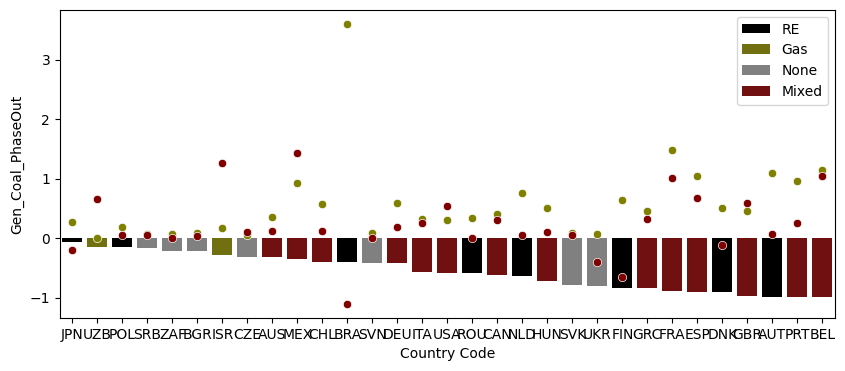

In [618]:
fig, axes = plt.subplots(figsize=(10,4))
all_last_rows = all_last_rows.sort_values(by="Gen_Coal_PhaseOut",ascending=False)
sns.barplot(all_last_rows,x="Country Code",y="Gen_Coal_PhaseOut",hue="label",palette=["black","olive","gray","maroon"],dodge = False)
sns.scatterplot(all_last_rows,x="Country Code",y="RE_vPeakCoal",color="olive")
sns.scatterplot(all_last_rows,x="Country Code",y="Gen_Gas_vPeakCoal",color="maroon")
#axes.set_ylim([-0.5,len(all_last_rows)-0.5])
axes.set_xlim([-0.5,len(all_last_rows)-0.5])

## gas decline

In [717]:
count = 0
for cntry in combined_data_new["Country Code"].unique():
    combined_data_cntry = combined_data_new[combined_data_new["Country Code"]==cntry]
    max_gas = combined_data_cntry["Electricity from gas (TWh)"].max()
    max_gas_year = combined_data_cntry[combined_data_cntry["Electricity from gas (TWh)"]==max_gas]["Year"].iloc[-1]
    if max_gas_year < combined_data_cntry["Year"].max()-5 and combined_data_cntry["Gas_Current_MW"].max()>1000:
        max_gas_row = combined_data_cntry[combined_data_cntry["Year"]==max_gas_year]
        combined_data_cntry["max_gas"] = max_gas
        combined_data_cntry["max_gas_year"] = max_gas_year
        max_gas_perc_row = combined_data_cntry[combined_data_cntry["Share_Gas_Gen"]==combined_data_cntry["Share_Gas_Gen"].max()]
        combined_data_cntry["max_perc_gas"] = max_gas_perc_row["Share_Gas_Gen"].iloc[0]
        combined_data_cntry["max_perc_gas_year"] = max_gas_perc_row["Year"].iloc[-1]
        combined_data_cntry["Gen_Gas_vPeak"] = combined_data_cntry["Electricity from gas (TWh)"]/max_gas
        if count == 0:
            gas_calc_data = combined_data_cntry
        else:
            gas_calc_data = pd.concat([gas_calc_data,combined_data_cntry])
        count = count + 1
# remove north korea
gas_calc_data = gas_calc_data[gas_calc_data["Country Code"]!="PRK"]
gas_calc_data["year_since_peak_gas"] = gas_calc_data["Year"]-gas_calc_data["max_gas_year"]
#gas_calc_data.set_index(["Country Code"]).to_csv("hist_gas_generation.csv")
gas_calc_data

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen,max_gas,max_gas_year,max_perc_gas,max_perc_gas_year,Gen_Gas_vPeak,year_since_peak_gas
230,IND,1985,25411.6,148.5,1939.0,25411.6,0.0,0.0,0.0,46.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-25
231,IND,1986,28831.6,167.9,1939.0,28831.6,0.0,0.0,0.0,47.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-24
232,IND,1987,31841.6,184.6,1939.0,31841.6,0.0,0.0,0.0,48.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-23
233,IND,1988,35289.6,203.4,1939.0,35289.6,0.0,0.0,0.0,49.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-22
234,IND,1989,39605.1,226.8,1939.0,39605.1,0.0,0.0,0.0,50.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,SYR,2017,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.588032,0.006329,24.48,2010,0.614558,2021,0.417484,7
3807,SYR,2018,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.588098,0.005834,24.48,2010,0.614558,2021,0.411765,8
3808,SYR,2019,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.614458,0.005422,24.48,2010,0.614558,2021,0.416667,9
3809,SYR,2020,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.612658,0.005696,24.48,2010,0.614558,2021,0.395425,10


Text(0.5, 0, 'Years since peak gas generation')

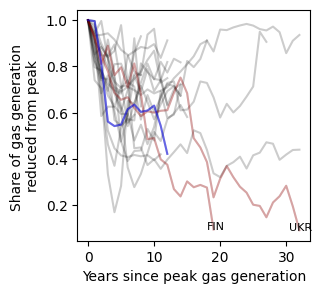

In [689]:
fig, axes = plt.subplots(figsize=(3,3))
plot_data = gas_calc_data[gas_calc_data["year_since_peak_gas"]>=0]
complete_list = plot_data[plot_data['Gen_Gas_vPeak']<0.1]
x = list(complete_list["year_since_peak_gas"])
y = list(complete_list["Gen_Gas_vPeak"])
text = list(complete_list["Country Code"])
plot_data_complete = plot_data[plot_data["Country Code"].isin(text)]
sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data_complete,
             color="red",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data[plot_data["Country Code"]=="IND"],
             color="blue",units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
for i in np.arange(len(x)):
    axes.text(x[i]*0.95,y[i],text[i], horizontalalignment='left',fontsize=8)
axes.set_ylabel("Share of gas generation \nreduced from peak")
axes.set_xlabel("Years since peak gas generation")

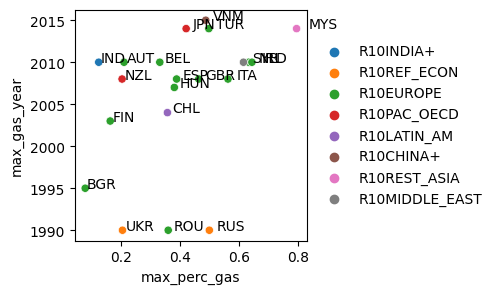

In [673]:
fig, axes = plt.subplots(figsize=(3,3))
max_data_gas = gas_calc_data[["Country Code","max_gas_year","max_perc_gas","AR6_R10"]].drop_duplicates()
sns.scatterplot(x="max_perc_gas",y='max_gas_year',hue="AR6_R10",data=max_data_gas,ax=axes)
x = list(max_data_gas["max_perc_gas"])
y = list(max_data_gas["max_gas_year"])
text = list(max_data_gas["Country Code"])
for i in np.arange(len(x)):
    axes.text(x[i]*1.05,y[i],text[i], horizontalalignment='left')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)

In [703]:
all_countries = list(gas_calc_data["Country Code"].unique())
count = 0
for cntry in all_countries:
    last_row = gas_calc_data[gas_calc_data["Country Code"]==cntry].iloc[[-1]]
    if count == 0:
        all_last_rows_gas = last_row
    else:
        all_last_rows_gas = pd.concat([all_last_rows_gas,last_row])
    count = count+1
all_last_rows_gas

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen,max_gas,max_gas_year,max_perc_gas,max_perc_gas_year,Gen_Gas_vPeak,year_since_peak_gas
267,IND,2022,235848.70,1097.5,1939.0,235848.70,14992.0,1240.0,494.1,83.0,...,0.038113,0.025186,0.027123,0.741642,118.03000,2010,0.125903,2010,0.422350,12
432,RUS,2022,39668.50,227.7,1941.0,43637.50,3715.0,50.0,4286.0,81.0,...,0.005041,0.203089,0.429641,0.176361,511.61584,1990,0.499308,2010,0.936288,32
506,BEL,2022,0.00,0.0,1949.0,2865.00,2188.0,0.0,677.0,73.0,...,0.127617,0.466589,0.244449,0.000423,30.84000,2010,0.332077,2010,0.749676,12
578,BGR,2022,5149.00,31.0,1951.0,6356.00,120.0,0.0,1260.0,71.0,...,0.028272,0.325425,0.057533,0.422894,3.21000,1995,0.080338,1993,0.906542,27
722,HUN,2022,1194.00,7.3,1951.0,1709.00,250.0,0.0,265.0,71.0,...,0.017173,0.446227,0.249437,0.081644,15.23000,2007,0.381131,2007,0.581747,15
794,ESP,2022,2945.50,15.9,1951.0,13800.60,8966.9,317.7,1925.2,71.0,...,0.217162,0.205154,0.305467,0.026755,120.80000,2008,0.388837,2008,0.720199,14
865,ITA,2022,6806.00,33.2,1952.0,9967.00,1085.0,0.0,3109.0,70.0,...,0.071398,0.000000,0.506849,0.075988,172.77000,2008,0.562189,2007,0.818082,14
1076,UKR,2022,22082.00,127.8,1953.0,24218.00,2136.0,0.0,0.0,69.0,...,0.010899,0.580579,0.041093,0.198142,49.89000,1990,0.206131,2004,0.092203,32
1214,GBR,2022,5234.00,26.8,1954.0,35856.50,15572.5,0.0,15050.0,68.0,...,0.246176,0.148235,0.392594,0.016098,176.22000,2008,0.463567,2010,0.723811,14
1548,JPN,2022,53586.98,252.8,1957.0,53586.98,1618.9,413.4,1055.0,65.0,...,0.009465,0.053573,0.341723,0.329258,433.09000,2014,0.421003,2014,0.762774,8


In [ ]:
### export gas and coal data 
result_database = pd.merge(generation_data,calc_data[["Code","Year",'Gen_Coal_vPeak', 
       'Gen_Solar_vPeakCoal',  'Gen_Wind_vPeakCoal', 'Gen_Nuclear_vPeakCoal',
       'Gen_Gas_vPeakCoal', 'Gen_Growth', 'Gen_Coal_PhaseOut', 'RE_vPeakCoal', 'rate_decline_gen',
       'rate_decline_share']],on=["Code","Year"],how="left")
result_database = result_database.drop(columns=["AR6_R10","Entity"]).drop_duplicates()
result_database = pd.merge(result_database, gas_calc_data[["ISO","Year",'Gen_Gas_vPeak']],
                           on=["ISO","Year"],how="left")
result_database["Share_Coal_GenDecline"] = 100-result_database["Gen_Coal_vPeak"]*100
result_database["Share_Gas_GenDecline"] = 100-result_database["Gen_Gas_vPeak"]*100
result_database = result_database.fillna(0)
result_database = result_database.drop(columns=["ISO","Gen_Coal_vPeak","Gen_Gas_vPeak"])
result_database.set_index(["Code","Year"]).to_csv("generation_results_data.csv")
result_database

,Code,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Electricity generation (TWh),Share_Solar_Gen,Share_Wind_Gen,...,Gen_Wind_vPeakCoal,Gen_Nuclear_vPeakCoal,Gen_Gas_vPeakCoal,Gen_Growth,Gen_Coal_PhaseOut,RE_vPeakCoal,rate_decline_gen,rate_decline_share,Share_Coal_GenDecline,Share_Gas_GenDecline
0,AFG,2000,0.00,0.0,0.0,0.0,0.00,0.47,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,2001,0.00,0.0,0.0,0.0,0.00,0.59,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,2002,0.00,0.0,0.0,0.0,0.00,0.69,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,2003,0.00,0.0,0.0,0.0,0.00,0.94,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,2004,0.00,0.0,0.0,0.0,0.00,0.89,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,ZWE,2017,0.01,0.0,0.0,0.0,3.02,7.35,0.001361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5654,ZWE,2018,0.02,0.0,0.0,0.0,3.69,9.19,0.002176,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5655,ZWE,2019,0.03,0.0,0.0,0.0,3.62,8.24,0.003641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5656,ZWE,2020,0.03,0.0,0.0,0.0,3.36,7.59,0.003953,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
